<a href="https://colab.research.google.com/github/pratyaksh12/Computer_Vision_and_CNN/blob/main/03_Computer_Vision_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision

##Computer Vision Libraries in PyTorch
- torchvision - basic computer Vision Library for PyTorch `look more in the main page`
- torchvison.datasets - get datasets and dataloading finction for computer vision here
- torchvision.models - pretrained computer vision models that can be levereaged for your own problem
- torchvision.transform - to transform the images/ vision data to be suitable for use in ur ML Model
- torch.utils.data.Datasets - base dataset class for torchvision
- torch.utils.data.Dataloader - creates a python iterable over Datasets

In [1]:
#import torch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import viasualisation tools
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


## 1. Getting a dataset
FashionMNIST - is a take on MNIST database

In [2]:
#getting the training data
train_data = datasets.FashionMNIST(
    root = "data", #Where to download
    train = True, #do we want the training dataset
    download = True, # do we want to download it?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to transform the labels/Targets
)
#getting the testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None,
    download = True
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.73MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]

In [5]:
image.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [6]:
data_classes = train_data.classes
print(f"image shape : {image.shape}, image label : {data_classes[label]}")

image shape : torch.Size([1, 28, 28]), image label : Ankle boot


In [7]:
label_data = train_data.class_to_idx
label_data

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##Visualising the images

In [8]:
print("Hello world")

Hello world


inage shape = torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

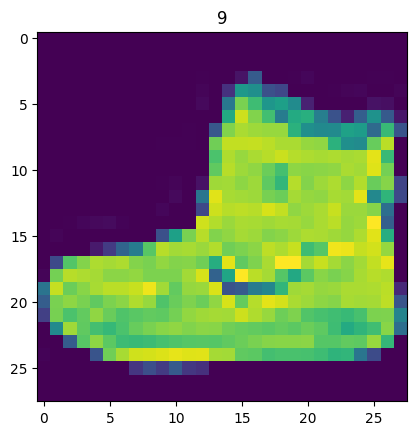

In [9]:
image, label = train_data[0]

print(f"inage shape = {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

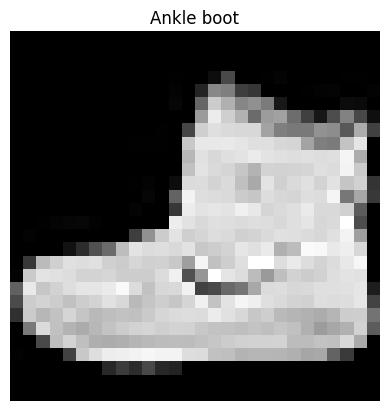

In [10]:
plt.imshow(image.squeeze(), cmap = "grey")
plt.title(data_classes[label])
plt.axis(False)

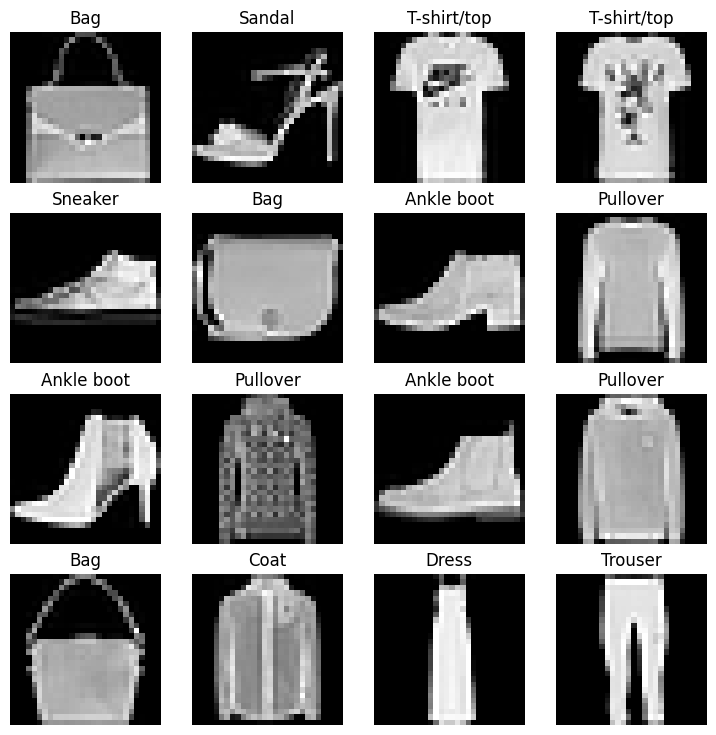

In [11]:
#plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
  random_idx = int(torch.randint(0,len(train_data), size = [1]).item())
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "grey")
  plt.title(data_classes[label])
  plt.axis(False)

# can we make these model with just pure linear lines or do we need non-Linearity??

##2. Prepare dataLoader

our data is in the form of PyTorch Datasets.
DataLoader turns our dataset to a python iterator.
more specifically we need to turn ur data to batches or mini batches.

- Why do we need batches?

1. more computationally economical and efficient. The computer may not be able to take a hit of 60000 image sin one go due to storage so we can break it down to 32 batches at a time.

2. It gives our neural network more chances to upgrade their gradients per epoch

In [12]:
from torch.utils.data import DataLoader

#Setup the batch size
BATCH_SIZE = 32

#turn datasets into iterables
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False) # no need to shuffle for testing since model will be using this data for evaluation and not testing

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e908a4777d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e908a37ae50>)

In [13]:
print(f"dataloaders = {train_dataloader, test_dataloader}")
print(f"Lenght of train dataloader = {len(train_dataloader)}, batch size = {train_dataloader.batch_size}")
print(f"Lenght of train dataloader = {len(test_dataloader)}, batch_size = {test_dataloader.batch_size}")


dataloaders = (<torch.utils.data.dataloader.DataLoader object at 0x7e908a4777d0>, <torch.utils.data.dataloader.DataLoader object at 0x7e908a37ae50>)
Lenght of train dataloader = 1875, batch size = 32
Lenght of train dataloader = 313, batch_size = 32


In [14]:
train_features_batch, train_label_batch = next(iter(train_dataloader))

In [15]:
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
import random
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]

Label = 1, image_shape = torch.Size([1, 28, 28])


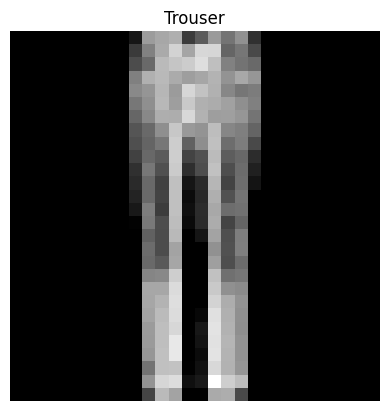

In [17]:
plt.imshow(img.squeeze(), cmap = "grey")
plt.title(data_classes[label])
plt.axis(False)
print(f"Label = {label}, image_shape = {img.size()}")

##Make a model for computer vision

- When starting to build a series of machine learning modelling experimets, it's best practice to start with a baseline model
- A baseline model is a simple model you will try and improve upon with subsequent model/experimets

- start simpe and increase complexity slowly

In [18]:
##Create a flatten layer

flatten_model = nn.Flatten()

In [19]:
x = train_features_batch[0]
x_flatten = flatten_model(x)

In [20]:
print(f"original_shape = {x.shape} -> [color_channels, height, width]")
print(f"flatten_shape = {x_flatten.shape} -> [color_chanels, height * width]")

original_shape = torch.Size([1, 28, 28]) -> [color_channels, height, width]
flatten_shape = torch.Size([1, 784]) -> [color_chanels, height * width]


In [21]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features = hidden_units),
        # nn.Linear(in_features=hidden_units, out_fetures = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape = (28 * 28), hidden_units = 10, output_shape = len(data_classes)).to('cpu')

In [23]:
dummy_x = torch.rand(size = (1,1,28,28)) # [batch_size, color_channels, width, height]
dummy_x.size()

torch.Size([1, 1, 28, 28])

In [24]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(dummy_x)
print(y_pred.size())
print(data_classes[torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1).item()])

torch.Size([1, 10])
Coat


In [25]:
import requests
from pathlib import Path

if Path("python_helper.py").is_file():
  print("file already present")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('python_helper.py', 'wb') as f:
    f.write(request.content)

In [26]:
#setup a loss functuoin and an optimizer

loss_fn = nn.CrossEntropyLoss() # we are dealing with a multi class problem
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

In [27]:
from python_helper import accuracy_fn

###Creating function to time our experiment

- Machine Learning is very experimental :
- you wnat to track two things
  1. how fast the model run
  2. Model's performance(accuracy)

In [28]:
from timeit import default_timer as timer

def print_train_time(start, end, device : torch.device = None):
  print(f"Device is {device}")
  print(f"Total time taken for the model to complete training = {(end - start):.4f} seconds")
  return end - start


In [29]:
start = timer()
# yo wassus
end = timer()

print_train_time(start, end)

Device is None
Total time taken for the model to complete training = 0.0000 seconds


3.9270999991458666e-05

##Training and testing loop

- Loop through epochs
- Loop through batches, perform training steps, calculate the train-loss per batch
- Loop through the testing batches, perform testing steps, calculate test-loss per batches
- print out what's happenin


In [30]:
len(train_dataloader)

1875

In [31]:
batches, label = next(iter(train_dataloader))

In [32]:
(len(batches) * 1000)/60000

0.5333333333333333

In [33]:
# #import tqdm for progress bar

# from tqdm.auto import tqdm

# #set the seed and set the timer
# torch.manual_seed(42)

# train_time_start_on_cpu = timer()

# #set the epochs
# epochs = 3

# for epoch in tqdm(range(epochs)):
#   print(f"Epoch : {epoch}")
#   ###Training
#   train_loss = 0

#   for batch, (X, y) in enumerate(train_dataloader):
#     model_0.train()

#     #forward pass
#     y_logits = model_0(X)

#     #Calculate loss(per batch)
#     loss = loss_fn(y_logits, y)
#     train_loss += loss

#     #zero grad the optimizer
#     optimizer.zero_grad()

#     #Backward pass
#     loss.backward()

#     #gradient descent
#     optimizer.step()
#     if batch % 400 == 0:
#       print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

#   train_loss /= len(train_dataloader)

#   ###Test-loss
#   test_loss, test_acc = 0,0

#   model_0.eval()
#   with torch.inference_mode():
#     for X_test,y_test in test_dataloader:
#       #Forwar pass
#       y_logits_test = model_0(X_test)

#       #calc collective loss
#       loss_test = loss_fn(y_logits_test, y_test)
#       test_loss += loss_test


#       #Calculate the accuracy
#       test_acc += accuracy_fn(y_test, torch.argmax(y_logits_test, dim = 1))

#     #Calculate test loss average per batch
#     test_loss /= len(test_dataloader)

#     #Calculate the test acc per batch
#     test_acc /= len(test_dataloader)

#   #print what's happening
#   print(f"Training loss = {train_loss:.4f}, test_loss = {test_loss :.4f}, Test_acc = {test_acc :.4f}")

#   #Calculate the training time
#   train_time_end_on_cpu = timer()

# print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

In [34]:
str(next(model_0.parameters()).device)

'cpu'

##Evaluating the model - get predictions and get model_0 results



In [35]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  """
  return a dictionary of model predictions om data_loader
  """

  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      y_logit = model(X)

      ##Accumulate the loss and accuracy
      loss += loss_fn(y_logit, y)
      acc += accuracy_fn(y, torch.argmax(torch.softmax(y_logit ,dim = 1),dim = 1))


    # loss /= len(dataloader)
    # acc /= len(dataloader)

  return {"model_name" : model.__class__.__name__, "avg_loss_per_batch": (loss/len(dataloader)).item(), "avg_acc_per_batch": (acc/len(dataloader))}

model_evaluation = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_evaluation

{'model_name': 'FashionMNISTModelV0',
 'avg_loss_per_batch': 2.3190648555755615,
 'avg_acc_per_batch': 10.852635782747603}

In [36]:
!nvidia-smi

Tue Jan 21 12:49:46 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [37]:
torch.cuda.is_available()

True

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [39]:
class ModelFashionMNISTV2(nn.Module):
  def __init__(self, input, hidden, output):
    super().__init__()

    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input, out_features = hidden),
        nn.ReLU(),
        nn.Linear(in_features= hidden, out_features = hidden),
        nn.ReLU(),
        nn.Linear(in_features= hidden, out_features = output)
    ).to(device)

  def forward(self, x):
    return self.linear_stack(x)

model_1 = ModelFashionMNISTV2((28 * 28), 10, 10)
model_1

ModelFashionMNISTV2(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [40]:
#Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [41]:
_,label = next(iter(train_dataloader))
type(label)

torch.Tensor

In [42]:
# epochs = 3

# for epoch in range(epochs):
#   model_1.train()
#   total_loss = 0
#   #iterate throught the batches
#   for batch_no, (X, y) in enumerate(train_dataloader):
#     #correct the device
#     X = X.to(device)
#     y = y.to(device)

#     #Forward pass
#     y_pred = model_1(X)

#     #Calc loss
#     loss = loss_fn(y_pred, y)
#     total_loss += loss.item()

#     #Zero grad
#     optimizer.zero_grad()

#     #Backward pass
#     loss.backward()

#     #Gradient descent
#     optimizer.step()

#     if batch_no % 400 == 0:
#       print(f"Looked at {batch_no * 32}/{len(train_dataloader.dataset)} samples")

#   test_loss = 0
#   model_1.eval()
#   with torch.inference_mode():
#     for X_test,y_test in test_dataloader:
#       X_test = X_test.to(device)
#       y_test = y_test.to(device)

#       #Forward pass
#       y_test_pred = model_1(X_test)

#       #Calculate loss
#       test_loss += loss_fn(y_test_pred, y_test).item()

#   total_loss = total_loss / len(train_dataloader)
#   test_loss = test_loss / len(test_dataloader)

#   print(f"Epoch = {epoch + 1}, Average Loss = {total_loss :.4f}, Test_loss = {test_loss :.4f}")





##Building a CNN

##Hyper parameters of a Convulautional Layer

1. Kernel_size: also referred to as the filter size, referes to the dimension of the sliding window. Having a smaller kernel size means that more data will be extracted and more depth can be achieved. Larger kernels extracts shallow depths but the the result can be produced faster as kernel has to iterate less data.
2. Padding: allows the kernel to extend beyond the activation map. Padding conserves the data at the borders of the activation maps leading to a better performance
3. Stride: indicates how many pixels should the kernel should be shifted over time

In [56]:
#create a Convulutional Neural Network

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_units, hidden_units, output_units):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7 , out_features = output_units)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier_layer(x)
    # print(x.shape)
    return x

In [57]:
torch.manual_seed(42)

model_cnn = FashionMNISTModelV2(input_units = 1, hidden_units = 10, output_units=len(train_data.classes)).to(device)

## steping through nn.conv2d

In [45]:
torch.manual_seed(42)
model_cnn(image.to(device).unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
torch.manual_seed(42)

images = torch.rand(size = (32,3,64,64))
test_image = images[0]
print(f"image batch shape {images.shape}")
print(f"image sample shape {test_image.shape}")

image batch shape torch.Size([32, 3, 64, 64])
image sample shape torch.Size([3, 64, 64])


In [47]:
##create a songle conv2d layer

conv_layer = nn.Conv2d(in_channels = 3, out_channels= 10, kernel_size = 3 , stride= 1, padding= 0)
result_data = conv_layer(test_image)

print(f"Original shape of the data = {test_image.shape}")
print(f"shape of the data after passing through convulutional layer= {result_data.shape}")

Original shape of the data = torch.Size([3, 64, 64])
shape of the data after passing through convulutional layer= torch.Size([10, 62, 62])


In [48]:
##Create a maxpool layer

max_pool_layer = nn.MaxPool2d(kernel_size = 2)
final_data = max_pool_layer(result_data)

# print(f"Shape of data before = {result_data.shape}")
# print(f"Shape of data after = {final_data.shape}")

Shape of data before = torch.Size([10, 62, 62])
Shape of data after = torch.Size([10, 31, 31])


In [49]:
##Experimenting with maxpool

data = torch.rand(size = (1,2,2)) # initial size -> [1,4,4]
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
pooled_data = max_pool_layer(data) # expected size -> [1,2,2]
print(f"data inside the tensor = {data}")
print(f"shape of data before = {data.shape}")
print(f"data after the pooling of tensor = {pooled_data}")
print(f"shape of data after pooling = {pooled_data.shape}")

data inside the tensor = tensor([[[0.8752, 0.8225],
         [0.0145, 0.2480]]])
shape of data before = torch.Size([1, 2, 2])
data after the pooling of tensor = tensor([[[0.8752]]])
shape of data after pooling = torch.Size([1, 1, 1])


In [50]:
#experimenting with a dummy tensor for the model



In [51]:
image, label = train_data[0]

(-0.5, 27.5, 27.5, -0.5)

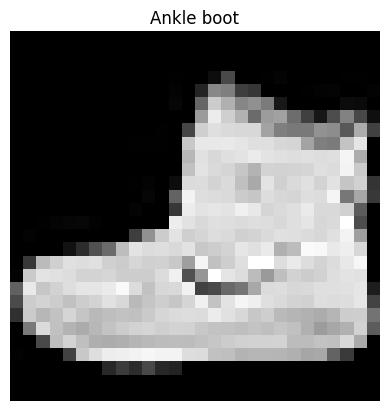

In [52]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(train_data.classes[label])
plt.axis(False)

## setup a loss and optimizer function

In [65]:
from python_helper import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr = 0.01)

In [66]:
##Training and testing loop

from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epochs)):

  #training mode
  total_loss, total_acc = 0, 0
  model_cnn.train()
  for batch, (X,y) in enumerate(train_dataloader):
    #put X and y to the right device
    X = X.to(device)
    y = y.to(device)

    #Forward pass
    y_logits = model_cnn(X)

    #Calculate loss
    loss = loss_fn(y_logits, y)
    total_loss += loss.item()
    total_acc += accuracy_fn(y, torch.argmax(torch.softmax(y_logits, dim = 1), dim = 1))

    #zero gradding
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #gradient descent
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch * 32}/{len(train_dataloader.dataset)} samples")
      print(loss.item())

  #Testing
  test_loss, test_acc = 0,0
  model_cnn.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)

      #Forward pass
      y_test_logits = model_cnn(X_test)

      #Calculate loss
      test_loss += loss_fn(y_test_logits, y_test).item()

      #Calculate accuracy
      test_acc += accuracy_fn(torch.argmax(torch.softmax(y_test_logits,dim = 1), dim = 1), y_test)


  total_loss /= len(train_dataloader)
  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

  print(f"Epoch = {epoch + 1}, loss = {total_loss}, testing loss = {test_loss}, accuracy = {test_acc}")








  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples
0.46422329545021057
looked at 12800/60000 samples
0.2869965434074402
looked at 25600/60000 samples
0.2015525996685028
looked at 38400/60000 samples
0.39375126361846924
looked at 51200/60000 samples
0.22555537521839142
Epoch = 1, loss = 0.35013878868222237, testing loss = 0.3714928673431515, accuracy = 86.77116613418531
looked at 0/60000 samples
0.33199647068977356
looked at 12800/60000 samples
0.26703929901123047
looked at 25600/60000 samples
0.2718278169631958
looked at 38400/60000 samples
0.2968854606151581
looked at 51200/60000 samples
0.3939867615699768
Epoch = 2, loss = 0.3367304103076458, testing loss = 0.35611203984140205, accuracy = 87.46006389776358
looked at 0/60000 samples
0.20716162025928497
looked at 12800/60000 samples
0.12951387465000153
looked at 25600/60000 samples
0.4601864218711853
looked at 38400/60000 samples
0.24598118662834167
looked at 51200/60000 samples
0.30943480134010315
Epoch = 3, loss = 0.32607398410936195, testing loss = 0.343815